In [1]:
# Importing necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# Load the dataset from CSV file
data = pd.read_csv('boston_housing.csv')

In [3]:
# Separate features (X) and target (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

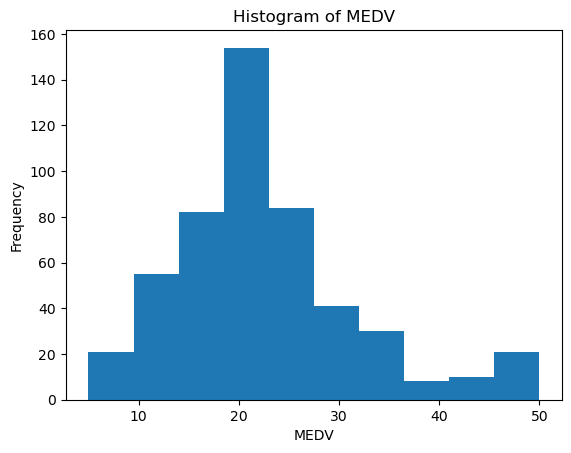

In [17]:
import matplotlib.pyplot as plt
# For example, to plot a histogram of the 'MEDV' column:
plt.hist(data['MEDV'])
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Histogram of MEDV')
plt.show()

In [4]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Data preprocessing: standardize the features and target
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

ModuleNotFoundError: No module named 'sklearn'

In [6]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [8]:
# Train the model
history = model.fit(x_train_scaled, y_train_scaled, batch_size=32, epochs=10, validation_data=(x_test_scaled, y_test_scaled))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 3.4423 - mae: 1.4685 - val_loss: 0.6506 - val_mae: 0.6031
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5525 - mae: 0.5553 - val_loss: 0.6528 - val_mae: 0.6127
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3968 - mae: 0.4786 - val_loss: 0.3937 - val_mae: 0.4466
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3483 - mae: 0.4071 - val_loss: 0.5119 - val_mae: 0.5246
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2971 - mae: 0.4083 - val_loss: 0.4511 - val_mae: 0.4825
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3271 - mae: 0.4185 - val_loss: 0.3674 - val_mae: 0.4203
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2752 - mae: 0.3791 - val_loss: 0.4525 - val_mae: 0.4871
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3191 - mae: 0.4163 - val_loss: 0.3839 - val_mae: 0.4415
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2829 - ma

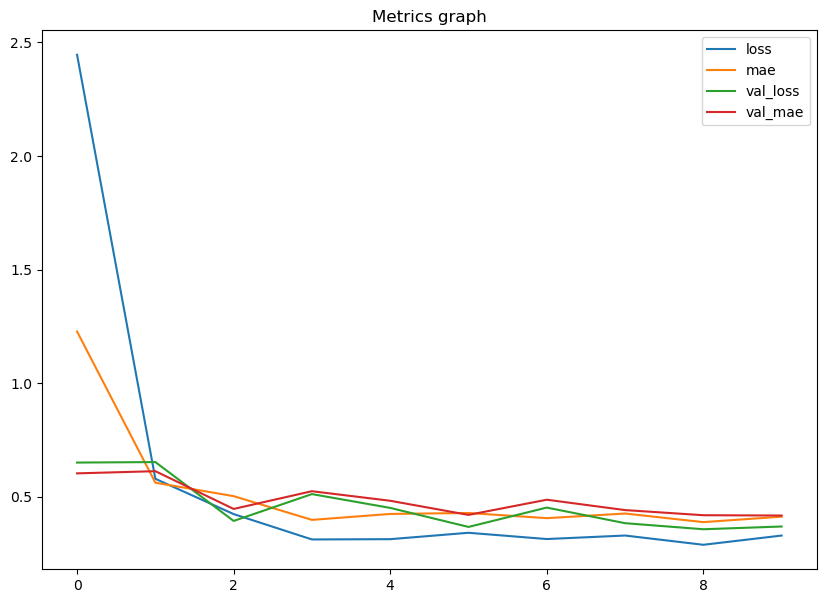

In [9]:
# Plot training history
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [10]:
# Predict on test data
y_pred_scaled = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [11]:
# Inverse scaling of predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)


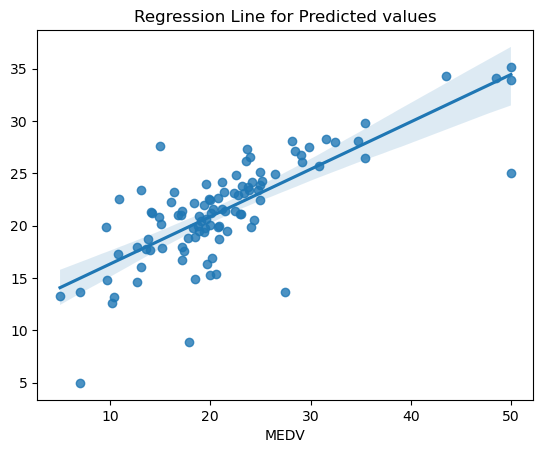

In [12]:
# Plot regression line
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [13]:
# Function to display regression metrics
def regression_metrics_display(y_true, y_pred):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print(f"MAE is {mae}")
    print(f"MSE is {mse}")
    print(f"R2 score is {r2}")


In [14]:
# Display regression metrics
regression_metrics_display(y_test, y_pred)

MAE is 3.8916252098831476
MSE is 32.07752045959445
R2 score is 0.5625819495843232


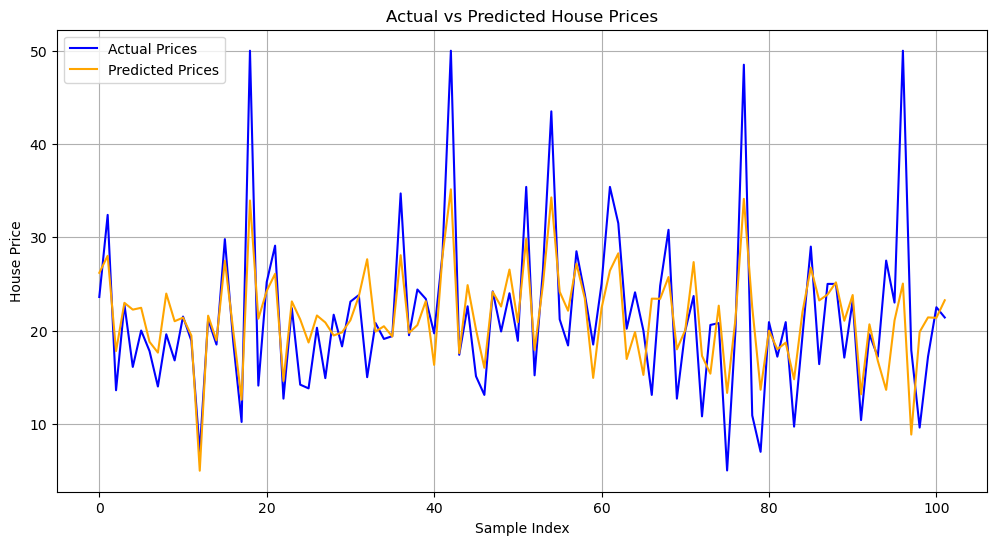

In [15]:
# Plotting actual and predicted house prices for each sample
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()
